In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

# Data Loading 

In [2]:
_data = load_diabetes()
data = _data["data"]
feature_names = _data["feature_names"]

df = pd.DataFrame(data, columns=feature_names)
df["target"] = _data["target"]

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


# EDA

In [3]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


<Axes: >

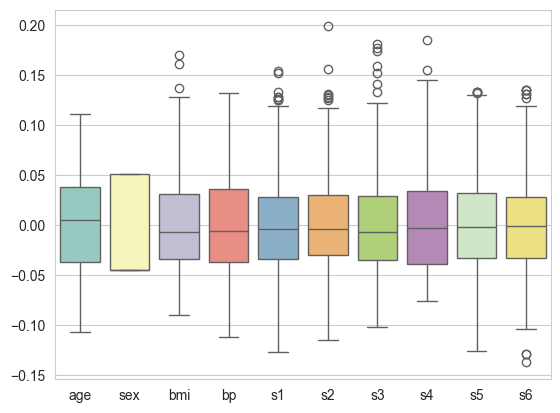

In [4]:
sns.boxplot(data=df.drop("target", axis=1))

## Correlation

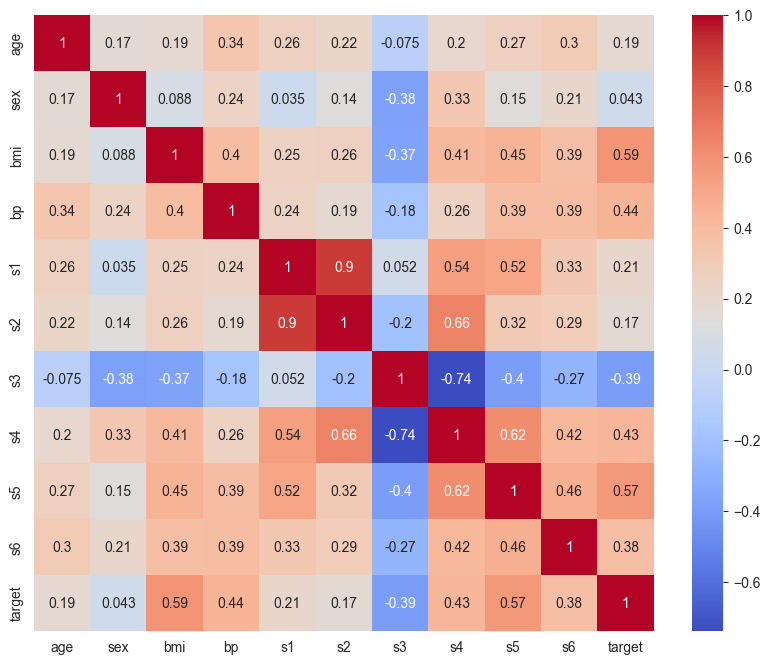

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    data=df.corr(),
    annot=True,
    cmap="coolwarm",
)

plt.title("Diabetes Dataset Correlation Heatmap")
plt.tight_layout()
plt.show()

In [6]:
# Remove s2 due to multicollinearity with s1
df_scaled_ = df.drop(["s2"], axis=1)
df_scaled_.head()

,age,sex,bmi,bp,s1,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0081,-0.0026,-0.0320,-0.0466,135.0000


# Linear Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

## Dataset Definition

In [8]:
X = df.drop(["target", "s2"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
print(len(df), len(X_train), len(X_test))

442 353 89


In [10]:
print(353 + 89, 353 / 442)

442 0.7986425339366516


In [11]:
X_train.head()

,age,sex,bmi,bp,s1,s3,s4,s5,s6
17,0.0708,0.0507,0.0121,0.0563,0.0342,-0.0397,0.0343,0.0274,-0.0011
66,-0.0091,0.0507,-0.0181,-0.0332,-0.0208,-0.0729,0.0712,0.0003,0.0196
137,0.0054,-0.0446,0.0498,0.0976,-0.0153,-0.0066,-0.0026,0.0170,-0.0135
245,-0.0273,-0.0446,-0.0353,-0.0298,-0.0566,0.0302,-0.0395,-0.0499,-0.1295
31,-0.0237,-0.0446,-0.0655,-0.0814,-0.0387,0.0597,-0.0764,-0.0371,-0.0425


In [12]:
y_train.head()

17    144.0000
66    150.0000
137   280.0000
245   125.0000
31     59.0000
Name: target, dtype: float64

## Model

[Reference] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.score(X_train, y_train)

0.5251250434558368

In [15]:
print(model.intercept_, model.coef_)

151.3010031750481 [  43.18112296 -241.37620081  555.70975248  344.64739047 -316.74521664
  -81.32562922  241.18350712  492.77226453   53.00257379]


In [16]:
X_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')

## Data Processing

Features to remove based on coefficient analysis:
 - sex, s1, s3: negative coefficients
 - age: small coefficient

In [23]:
X_ = X.drop(["sex", "s1", "s3", "age"], axis=1)
X_.head()

,bmi,bp,s4,s5,s6
0,0.0617,0.0219,-0.0026,0.0199,-0.0176
1,-0.0515,-0.0263,-0.0395,-0.0683,-0.0922
2,0.0445,-0.0057,-0.0026,0.0029,-0.0259
3,-0.0116,-0.0367,0.0343,0.0227,-0.0094
4,-0.0364,0.0219,-0.0026,-0.0320,-0.0466


<Axes: >

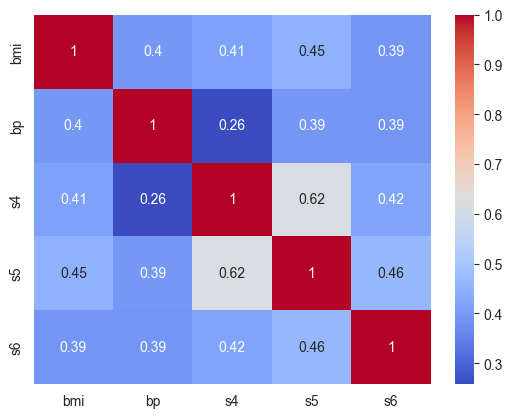

In [24]:
sns.heatmap(
    X_.corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation Heatmap of Selected Features")
plt.tight_layout()
plt.show()

## Retraining

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_, y, test_size=0.2, random_state=42
)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
print(model.score(X_train, y_train))
print(model.intercept_, model.coef_)

0.4852481320908061
151.68935419490444 [627.15198777 283.86807768  83.94593654 435.2848026   33.28132578]


In [28]:
X_train.columns

Index(['bmi', 'bp', 's4', 's5', 's6'], dtype='object')

## Prediction

In [29]:
pred = model.predict(X_test)

In [30]:
print(
    r2_score(y_test, pred),
    mean_squared_error(y_test, pred),
    mean_absolute_percentage_error(y_test, pred),
)

0.45268787688199763 2899.7426820819774 0.3899538453509261


## Metrics

In [35]:
# 모델 설명력 비교
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("=== 모델의 설명계수(R²) ===")
print(f"훈련 데이터 R²: {train_r2:.4f}")
print(f"테스트 데이터 R²: {test_r2:.4f}")
print(f"R² 차이 (훈련 - 테스트): {train_r2 - test_r2:.4f}")

=== 모델의 설명계수(R²) ===
훈련 데이터 R²: 0.4852
테스트 데이터 R²: 0.4527
R² 차이 (훈련 - 테스트): 0.0326


In [36]:
# 예측 성능 비교
# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 훈련 데이터 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2_manual = r2_score(y_train, y_train_pred)

# 테스트 데이터 평가
test_mse = mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2_manual = r2_score(y_test, y_test_pred)

print("\n=== 예측 성능 평가 ===")
print("훈련 데이터:")
print(f"  R²: {train_r2_manual:.4f}")
print(f"  MSE: {train_mse:.4f}")
print(f"  MAPE: {train_mape:.4f}")

print("\n테스트 데이터:")
print(f"  R²: {test_r2_manual:.4f}")
print(f"  MSE: {test_mse:.4f}")
print(f"  MAPE: {test_mape:.4f}")


=== 예측 성능 평가 ===
훈련 데이터:
  R²: 0.4852
  MSE: 3127.8372
  MAPE: 0.4150

테스트 데이터:
  R²: 0.4527
  MSE: 2899.7427
  MAPE: 0.3900


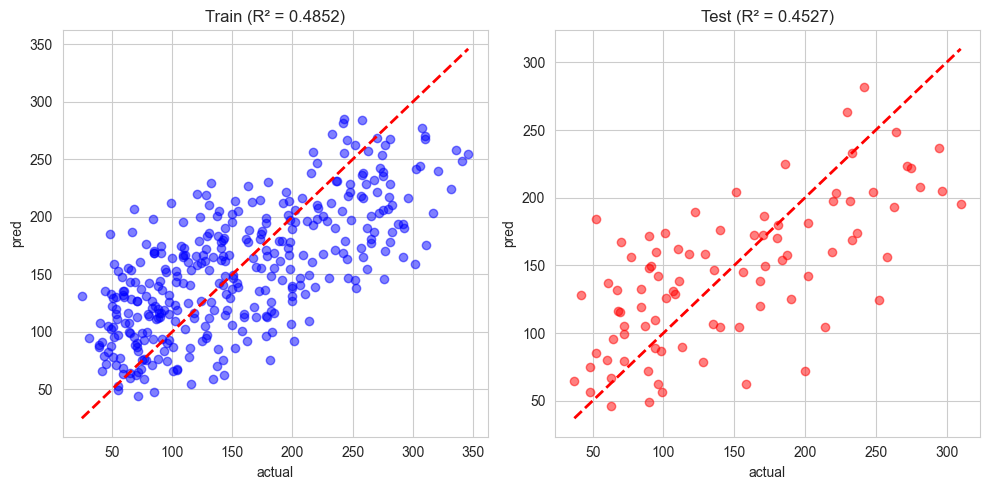


=== 모델 파라미터 ===
절편 (intercept): 151.6894

회귀계수 (coefficients):
  bmi: 627.1520
  bp: 283.8681
  s4: 83.9459
  s5: 435.2848
  s6: 33.2813


In [ ]:
# R² 시각화
plt.figure(figsize=(10, 5))

# 훈련 데이터
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", lw=2)
plt.xlabel("actual")
plt.ylabel("pred")
plt.title(f"Train (R² = {train_r2:.4f})")

# 테스트 데이터
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("actual")
plt.ylabel("pred")
plt.title(f"Test (R² = {test_r2:.4f})")

plt.tight_layout()
plt.show()

# 회귀계수와 절편 출력
print(f"\n=== 모델 파라미터 ===")
print(f"절편 (intercept): {model.intercept_:.4f}")
print("\n회귀계수 (coefficients):")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")

# End of Documents